In [1]:
%pip install statsmodels

  Using cached statsmodels-0.13.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing all the required libraries and modules
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from sklearn import preprocessing
# allow plots to appear directly in the notebook
%matplotlib inline

# Importing the data

In [3]:
price_data = pd.read_csv("price_demand_data.csv",parse_dates=['SETTLEMENTDATE'])
weather_data = pd.read_csv("weather_data.csv", parse_dates=['Date'])

In [4]:
price_data.tail()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
11659,VIC1,2021-08-31 22:00:00,4861.91,MEDIUM
11660,VIC1,2021-08-31 22:30:00,4748.74,MEDIUM
11661,VIC1,2021-08-31 23:00:00,4620.09,MEDIUM
11662,VIC1,2021-08-31 23:30:00,4834.00,MEDIUM
11663,VIC1,2021-01-09 00:00:00,4811.27,MEDIUM


In [5]:
price_data.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,2021-01-01 00:30:00,4179.21,LOW
1,VIC1,2021-01-01 01:00:00,4047.76,LOW
2,VIC1,2021-01-01 01:30:00,3934.70,LOW
3,VIC1,2021-01-01 02:00:00,3766.45,LOW
4,VIC1,2021-01-01 02:30:00,3590.37,LOW


In [6]:
weather_data.tail()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
238,2021-08-27,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,...,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
239,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,...,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
240,2021-08-29,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,...,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
241,2021-08-30,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,...,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2
242,2021-08-31,11.0,20.1,0.0,5.8,3.6,N,61.0,16:29,13.5,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2


In [7]:
price_data.shape

(11664, 4)

In [8]:
weather_data.shape

(243, 21)

In [9]:
# Renaming the Column
price_data = price_data.rename(columns={'SETTLEMENTDATE':'Date'})

#### We have two completely different dataset and we want to make a sense out of it.

#### First step - Converting the half hourly data into per day data.

In [10]:
# Grouping the data on the basis of date.
df = price_data.groupby([price_data['Date'].dt.date],sort=False,as_index=False).max()

In [11]:
df

,REGION,Date,TOTALDEMAND,PRICECATEGORY
0,VIC1,2021-01-01 23:30:00,5019.64,LOW
1,VIC1,2021-02-01 23:30:00,4964.35,LOW
2,VIC1,2021-03-01 23:30:00,4503.31,LOW
3,VIC1,2021-04-01 23:30:00,4764.18,LOW
4,VIC1,2021-05-01 23:30:00,4800.64,LOW
...,...,...,...,...
239,VIC1,2021-08-28 23:30:00,5716.32,MEDIUM
240,VIC1,2021-08-29 23:30:00,6227.89,MEDIUM
241,VIC1,2021-08-30 23:30:00,6072.91,MEDIUM
242,VIC1,2021-08-31 23:30:00,5779.56,MEDIUM


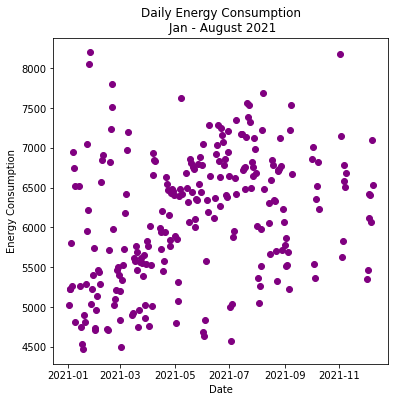

In [12]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(6, 6))

# Add x-axis and y-axis
ax.scatter(df['Date'],
           df['TOTALDEMAND'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Energy Consumption",
       title="Daily Energy Consumption\n Jan - August 2021")

plt.show()

<AxesSubplot:xlabel='PRICECATEGORY', ylabel='TOTALDEMAND'>

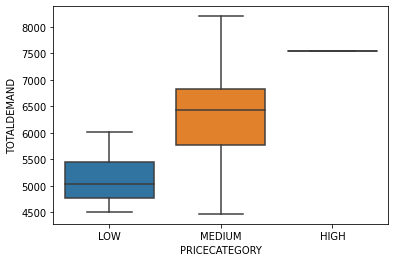

In [13]:
# Create figure and plot space
sns.boxplot(x = df['PRICECATEGORY'], y = df['TOTALDEMAND'])

#### Observing from both the dataset we found one outlier(extra info). Removing the outlier.

In [14]:
df.drop(df[df['Date']=='2021-01-09 00:00:00'].index,inplace=True)

In [15]:
df.shape # New shape of the data

(243, 4)

In [16]:
# Dropping the columns Date and Region
df = df.drop(columns=['Date','REGION'])

#### Combining the weather and price data to form a new data.

In [17]:
data = weather_data.join(df)

In [18]:
# new dataset
data.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND,PRICECATEGORY
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,2,1018.8,28.1,43,5.0,E,13,1015.3,5019.64,LOW
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,17,1013.3,28.7,38,7.0,SW,4,1008.5,4964.35,LOW
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,4,1007.7,23.5,59,4.0,SSW,2,1005.2,4503.31,LOW
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,11,1010.0,18.2,82,8.0,SSW,17,1011.0,4764.18,LOW
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,13,1012.5,18.2,82,8.0,SSE,19,1013.3,4800.64,LOW


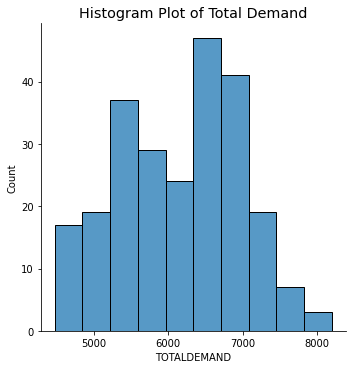

In [19]:
# plot a seaborn distribution plot
sns.displot(data['TOTALDEMAND'])

# set figure size using seaborn
sns.set(font_scale=1.2)

# but use matplotlib to set the title
plt.title('Histogram Plot of Total Demand')
# show the plot
plt.show()

In [20]:
Totaldemand_df = data[['Date', 'TOTALDEMAND']].groupby('Date').agg('mean')
Totaldemand_df.head()

,TOTALDEMAND
Date,
2021-01-01,5019.64
2021-01-02,5228.29
2021-01-03,5225.37
2021-01-04,5807.02
2021-01-05,5261.09


# Pre-Processing the data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               243 non-null    datetime64[ns]
 1   Minimum temperature (°C)           242 non-null    float64       
 2   Maximum temperature (°C)           242 non-null    float64       
 3   Rainfall (mm)                      241 non-null    float64       
 4   Evaporation (mm)                   243 non-null    float64       
 5   Sunshine (hours)                   243 non-null    float64       
 6   Direction of maximum wind gust     240 non-null    object        
 7   Speed of maximum wind gust (km/h)  240 non-null    float64       
 8   Time of maximum wind gust          240 non-null    object        
 9   9am Temperature (°C)               242 non-null    float64       
 10  9am relative humidity (%)          242

#### Dropping the NA values 

In [22]:
data = data.dropna(how ='any')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 241
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               237 non-null    datetime64[ns]
 1   Minimum temperature (°C)           237 non-null    float64       
 2   Maximum temperature (°C)           237 non-null    float64       
 3   Rainfall (mm)                      237 non-null    float64       
 4   Evaporation (mm)                   237 non-null    float64       
 5   Sunshine (hours)                   237 non-null    float64       
 6   Direction of maximum wind gust     237 non-null    object        
 7   Speed of maximum wind gust (km/h)  237 non-null    float64       
 8   Time of maximum wind gust          237 non-null    object        
 9   9am Temperature (°C)               237 non-null    float64       
 10  9am relative humidity (%)          237

#### From the above information we have columns which are of type object(Categorical data).We will encode the data

In [24]:
cols = ['PRICECATEGORY']

# Encode Categorical Columns
le = preprocessing.LabelEncoder()
data[cols] = data[cols].apply(le.fit_transform)

In [25]:
data.tail()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND,PRICECATEGORY
237,2021-08-26,5.5,12.9,1.2,2.4,1.0,SE,31.0,12:54,9.2,...,Calm,1022.7,12.2,55,7.0,SSE,13,1020.3,7126.76,1
238,2021-08-27,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,...,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4,6769.89,1
239,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,...,7,1018.6,17.4,31,3.0,NNW,24,1013.5,5716.32,1
240,2021-08-29,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,...,13,1011.4,12.8,84,7.0,S,6,1010.4,6227.89,1
241,2021-08-30,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,...,15,1016.1,16.8,45,1.0,NNW,28,1013.2,6072.91,1


#### In the column '9am wind speed (km/h)' . we observe it has an object.Hence we will check the unique values of that columns.

In [26]:
data['9am wind speed (km/h)'].unique()

array(['2', '17', '4', '11', '13', '6', '15', '7', '9', 'Calm', '19',
       '26', '20', '22', '30', '28'], dtype=object)

#### We observe the string Calm present in the array.Hence we check the frequency count and replace the calm with the most repeted value.

In [27]:
data.groupby(['9am wind speed (km/h)']).count()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind direction,9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND,PRICECATEGORY
9am wind speed (km/h),,,,,,,,,,,,,,,,,,,,,
11,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
13,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
15,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
17,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
19,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
20,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
22,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
26,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [28]:
data['9am wind speed (km/h)'] = data['9am wind speed (km/h)'].replace('Calm',9)
# Replacing calm by 9

In [29]:
data['9am wind speed (km/h)'] = data['9am wind speed (km/h)'].astype(int)
# Converting obj datatype to int

In [30]:
data['Time of maximum wind gust'].unique()

array(['13:14', '8:22', '17:55', '16:03', '11:02', '14:56', '13:21',
       '15:04', '9:46', '19:16', '14:55', '15:01', '21:58', '23:23',
       '14:49', '12:19', '15:53', '13:57', '15:22', '11:59', '16:47',
       '14:42', '14:58', '15:37', '13:20', '19:43', '23:06', '13:00',
       '16:34', '16:39', '21:08', '14:52', '16:58', '12:58', '10:27',
       '11:44', '11:23', '14:00', '11:22', '12:20', '4:17', '14:54',
       '13:52', '7:37', '9:27', '14:37', '8:26', '9:32', '16:51', '20:43',
       '15:24', '5:09', '13:42', '19:08', '14:18', '17:50', '22:57',
       '18:35', '13:24', '22:37', '0:36', '17:07', '16:30', '14:44',
       '14:35', '15:56', '12:35', '6:36', '2:19', '22:26', '13:50',
       '13:29', '16:04', '19:22', '13:37', '12:51', '14:29', '13:40',
       '4:55', '12:05', '14:21', '11:10', '13:08', '15:44', '11:49',
       '6:00', '11:45', '15:38', '12:38', '16:55', '14:36', '3:11',
       '14:43', '12:02', '2:30', '15:18', '1:40', '14:25', '10:53',
       '14:57', '11:20', '1

In [31]:
data['Time of maximum wind gust'] = data['Time of maximum wind gust'].str.replace(':','').astype(np.float64)

##### Performing similar analysis for '3pm wind speed (km/h)'

In [32]:
data['3pm wind speed (km/h)'].unique()

array(['13', '4', '2', '17', '19', '20', '11', '6', '9', '15', '7', '28',
       '24', '22', 'Calm', '26', '37'], dtype=object)

In [33]:
data.groupby(['3pm wind speed (km/h)']).count()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm MSL pressure (hPa),TOTALDEMAND,PRICECATEGORY
3pm wind speed (km/h),,,,,,,,,,,,,,,,,,,,,
11,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
13,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
15,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
17,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
19,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
20,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
22,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
24,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [34]:
data['3pm wind speed (km/h)'] = data['3pm wind speed (km/h)'].replace('Calm',13) # replacing by 13

In [35]:
data['3pm wind speed (km/h)'] = data['3pm wind speed (km/h)'].astype(int)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 241
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               237 non-null    datetime64[ns]
 1   Minimum temperature (°C)           237 non-null    float64       
 2   Maximum temperature (°C)           237 non-null    float64       
 3   Rainfall (mm)                      237 non-null    float64       
 4   Evaporation (mm)                   237 non-null    float64       
 5   Sunshine (hours)                   237 non-null    float64       
 6   Direction of maximum wind gust     237 non-null    object        
 7   Speed of maximum wind gust (km/h)  237 non-null    float64       
 8   Time of maximum wind gust          237 non-null    float64       
 9   9am Temperature (°C)               237 non-null    float64       
 10  9am relative humidity (%)          237

### Dealing with the wind direction

#### We observe empty cells present in the array. Hence we check the frequency count and replace empty cell with the most repeted value.

In [37]:
data['3pm wind direction'].unique()

array(['E', 'SW', 'SSW', 'SSE', 'N', 'WSW', 'WNW', 'S', 'SE', 'NNE', 'NW',
       'ENE', 'W', 'ESE', ' ', 'NNW'], dtype=object)

In [38]:
data.groupby(['3pm wind direction']).count()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND,PRICECATEGORY
3pm wind direction,,,,,,,,,,,,,,,,,,,,,
,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
E,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ENE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ESE,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
N,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
NNE,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
NNW,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
NW,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
S,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37


In [39]:
data['3pm wind direction'] = data['3pm wind direction'].replace(' ', 'SSW') # replacing by SSW

In [40]:
data['3pm wind direction'].unique()

array(['E', 'SW', 'SSW', 'SSE', 'N', 'WSW', 'WNW', 'S', 'SE', 'NNE', 'NW',
       'ENE', 'W', 'ESE', 'NNW'], dtype=object)

#### Performing similar analysis for '9am wind direction' 

In [41]:
data['9am wind direction'].unique()

array(['N', 'NNW', 'WSW', 'SSE', 'S', 'NE', 'NNE', 'ESE', 'SW', 'NW',
       'SE', ' ', 'ENE', 'SSW', 'W', 'E', 'WNW'], dtype=object)

In [42]:
data.groupby(['9am wind direction']).count()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND,PRICECATEGORY
9am wind direction,,,,,,,,,,,,,,,,,,,,,
,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
E,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
ENE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ESE,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
N,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
NE,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
NNE,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
NNW,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
NW,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [43]:
data['9am wind direction'] = data['9am wind direction'].replace(' ', 'N') # replacing by N

In [44]:
data['9am wind direction'].unique()

array(['N', 'NNW', 'WSW', 'SSE', 'S', 'NE', 'NNE', 'ESE', 'SW', 'NW',
       'SE', 'ENE', 'SSW', 'W', 'E', 'WNW'], dtype=object)

In [45]:
data['Direction of maximum wind gust '].unique()

array(['NNE', 'NNW', 'WSW', 'SSE', 'S', 'SSW', 'E', 'N', 'W', 'ESE', 'SE',
       'NW', 'SW', 'WNW', 'NE'], dtype=object)

### Now, we will convert the wind direction data to degrees
#### Reference : Windrose axis

In [46]:
#converting directions into degrees
mapper = {'N':0.0,'NNE':22.5,'NE':45.0,'ENE':72.5,'E':90.0,'ESE':112.5,'SE':135.0,'SSE':157.5,
          'S':180.0,'SW':225.0,'W':270.0,'WNW':292.5,'NW':315.0,'NNW':337.5,'SSW':202.5,'WSW':247.5}
cols = ['Direction of maximum wind gust ', '9am wind direction', '3pm wind direction']
data[cols] = data[cols].replace(mapper)

In [47]:
data.to_csv(r'C:\Users\iyerd\OneDrive\Desktop\Divya\Weather and price day_daily.csv', index = False, header=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 241
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               237 non-null    datetime64[ns]
 1   Minimum temperature (°C)           237 non-null    float64       
 2   Maximum temperature (°C)           237 non-null    float64       
 3   Rainfall (mm)                      237 non-null    float64       
 4   Evaporation (mm)                   237 non-null    float64       
 5   Sunshine (hours)                   237 non-null    float64       
 6   Direction of maximum wind gust     237 non-null    float64       
 7   Speed of maximum wind gust (km/h)  237 non-null    float64       
 8   Time of maximum wind gust          237 non-null    float64       
 9   9am Temperature (°C)               237 non-null    float64       
 10  9am relative humidity (%)          237

In [49]:
data.describe()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND,PRICECATEGORY
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,11.146835,19.519409,1.592405,3.922785,5.334177,172.500000,34.455696,1246.632911,13.821941,74.426160,...,10.362869,1017.663291,18.131646,57.037975,5.295359,175.843882,13.455696,1015.799156,6126.387046,0.827004
std,3.806924,5.362397,4.532718,2.707614,3.621074,119.747483,10.707352,503.177392,4.233766,14.145125,...,4.649947,7.673030,4.966077,14.126645,2.401734,103.230011,5.853720,7.488041,803.094679,0.379044
min,3.000000,10.600000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,5.000000,25.000000,...,2.000000,989.700000,8.600000,21.000000,0.000000,0.000000,2.000000,989.000000,4473.050000,0.000000
25%,8.100000,15.500000,0.000000,2.000000,2.100000,22.500000,28.000000,1110.000000,11.000000,65.000000,...,7.000000,1012.800000,14.400000,48.000000,3.000000,157.500000,9.000000,1011.000000,5504.370000,1.000000
50%,10.900000,18.300000,0.000000,3.200000,4.900000,202.500000,33.000000,1320.000000,13.400000,75.000000,...,9.000000,1018.100000,17.200000,56.000000,7.000000,202.500000,13.000000,1015.800000,6227.890000,1.000000
75%,13.900000,21.900000,0.600000,5.600000,8.300000,270.000000,41.000000,1457.000000,16.400000,84.000000,...,13.000000,1023.500000,20.300000,66.000000,7.000000,225.000000,17.000000,1021.600000,6752.130000,1.000000
max,22.200000,39.200000,43.200000,13.800000,13.100000,337.500000,67.000000,2347.000000,30.900000,100.000000,...,30.000000,1034.200000,35.200000,98.000000,8.000000,337.500000,37.000000,1032.400000,8196.830000,1.000000


In [50]:
#convert Date to int datatype
data['Date'] = data['Date'].apply(lambda x: x.toordinal())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 241
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               237 non-null    int64  
 1   Minimum temperature (°C)           237 non-null    float64
 2   Maximum temperature (°C)           237 non-null    float64
 3   Rainfall (mm)                      237 non-null    float64
 4   Evaporation (mm)                   237 non-null    float64
 5   Sunshine (hours)                   237 non-null    float64
 6   Direction of maximum wind gust     237 non-null    float64
 7   Speed of maximum wind gust (km/h)  237 non-null    float64
 8   Time of maximum wind gust          237 non-null    float64
 9   9am Temperature (°C)               237 non-null    float64
 10  9am relative humidity (%)          237 non-null    float64
 11  9am cloud amount (oktas)           237 non-null    int64  

In [51]:
#Rearranging the columns
data = data.reindex(columns=['Date', 'Minimum temperature (°C)', 'Maximum temperature (°C)',
       'Rainfall (mm)', 'Evaporation (mm)', 'Sunshine (hours)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am Temperature (°C)', '9am relative humidity (%)',
       '9am cloud amount (oktas)', '9am wind direction',
       '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)', 'Time of maximum wind gust', 'PRICECATEGORY', 'TOTALDEMAND'])

In [52]:
#Renaming the columns to remove special characters
data.rename({'Minimum temperature (°C)':"Min_temp", 'Maximum temperature (°C)':'Max_temp', 
             'Evaporation (mm)':'Evaporation', 'Sunshine (hours)':'Sunshine', 
             'Speed of maximum wind gust (km/h)':'Speed_of_maximum_wind_gust',
             '9am Temperature (°C)':'9am_temp', '9am relative humidity (%)':'9am_humidity',
             '9am cloud amount (oktas)':'9am_cloud_amount', '9am wind speed (km/h)':'9am_wind_speed', 
             '9am MSL pressure (hPa)':'9am_pressure', 'Rainfall (mm)': 'Rainfall',
             '3pm Temperature (°C)':'3pm_temp', '3pm relative humidity (%)':'3pm_humidity',
             '3pm cloud amount (oktas)':'3pm_cloud_amount', '3pm wind speed (km/h)':'3pm_wind_speed', 
             '3pm MSL pressure (hPa)':'3pm_pressure', 'Time of maximum wind gust':'Time_of_maximum_wind_gust', 
             'Direction of maximum wind gust ':'Direction_of_maximum_wind_gust'}, inplace=True, axis=1)

In [53]:
data.columns

Index(['Date', 'Min_temp', 'Max_temp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Direction_of_maximum_wind_gust', 'Speed_of_maximum_wind_gust',
       '9am_temp', '9am_humidity', '9am_cloud_amount', '9am wind direction',
       '9am_wind_speed', '9am_pressure', '3pm_temp', '3pm_humidity',
       '3pm_cloud_amount', '3pm wind direction', '3pm_wind_speed',
       '3pm_pressure', 'Time_of_maximum_wind_gust', 'PRICECATEGORY',
       'TOTALDEMAND'],
      dtype='object')

In [54]:
data.to_csv("Final data for modelling.csv", index = False)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 241
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            237 non-null    int64  
 1   Min_temp                        237 non-null    float64
 2   Max_temp                        237 non-null    float64
 3   Rainfall                        237 non-null    float64
 4   Evaporation                     237 non-null    float64
 5   Sunshine                        237 non-null    float64
 6   Direction_of_maximum_wind_gust  237 non-null    float64
 7   Speed_of_maximum_wind_gust      237 non-null    float64
 8   9am_temp                        237 non-null    float64
 9   9am_humidity                    237 non-null    float64
 10  9am_cloud_amount                237 non-null    int64  
 11  9am wind direction              237 non-null    float64
 12  9am_wind_speed                  237 

In [56]:
# visualize the relationship between the features and the response using pairplots
#sns.pairplot(data=data, diag_kind='kde')

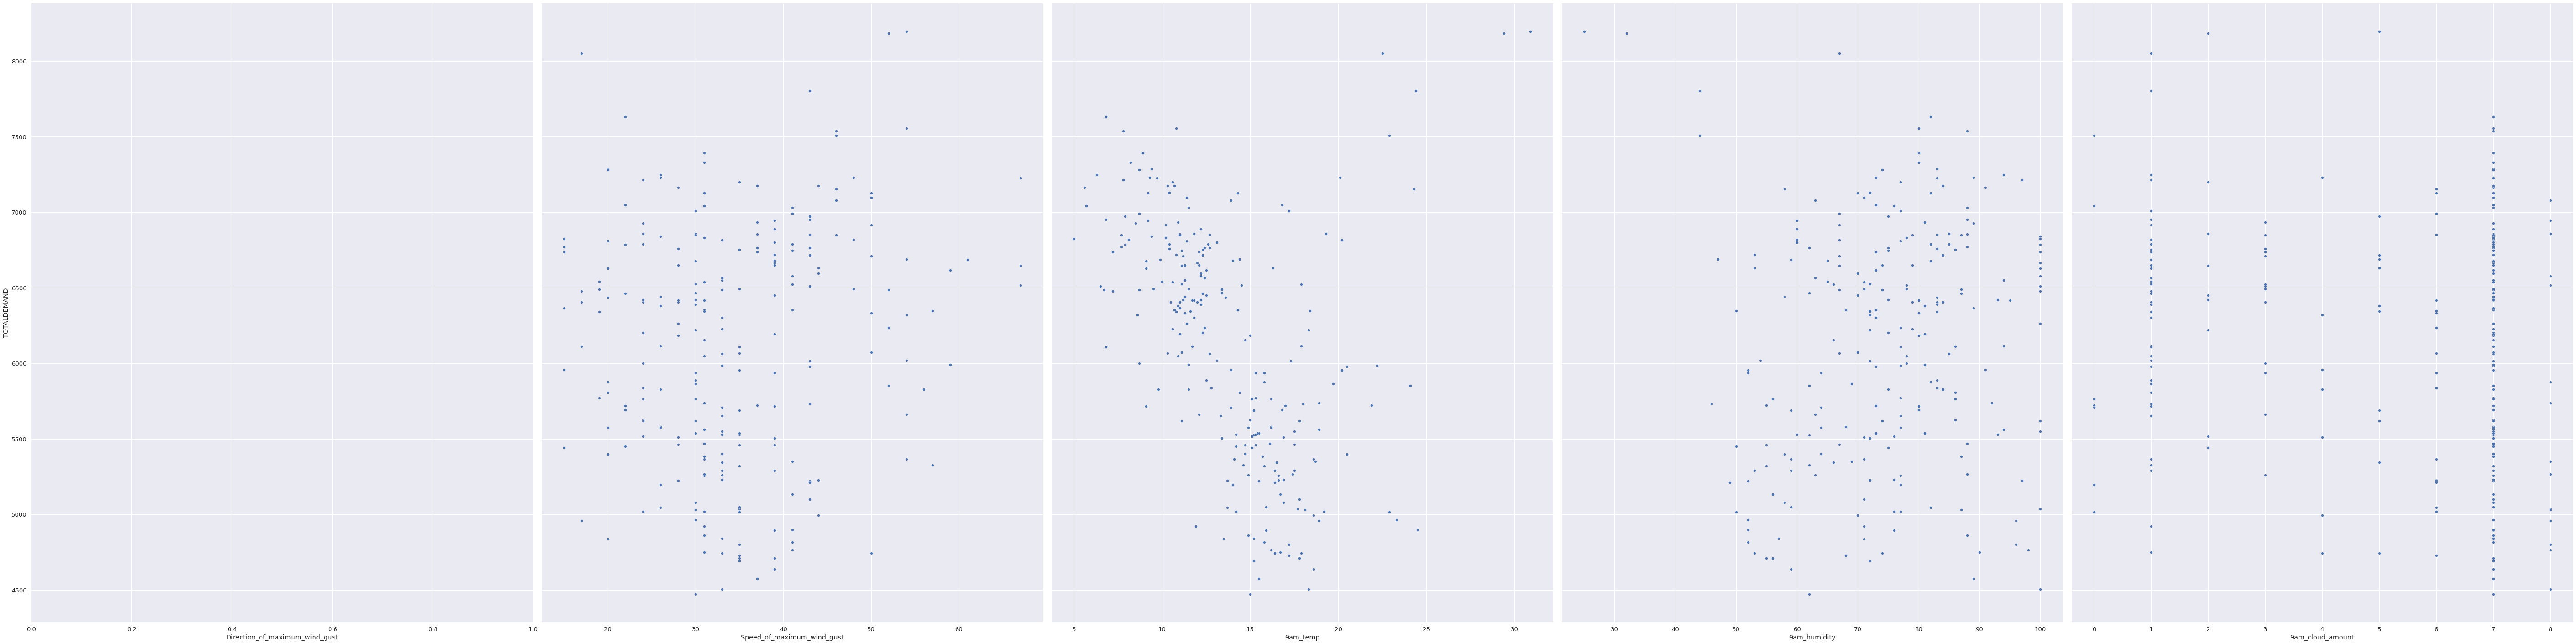

In [57]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['Direction_of_maximum_wind_gust', 'Speed_of_maximum_wind_gust',
       '9am_temp', '9am_humidity','9am_cloud_amount'], y_vars='TOTALDEMAND', height=20, aspect=0.8)

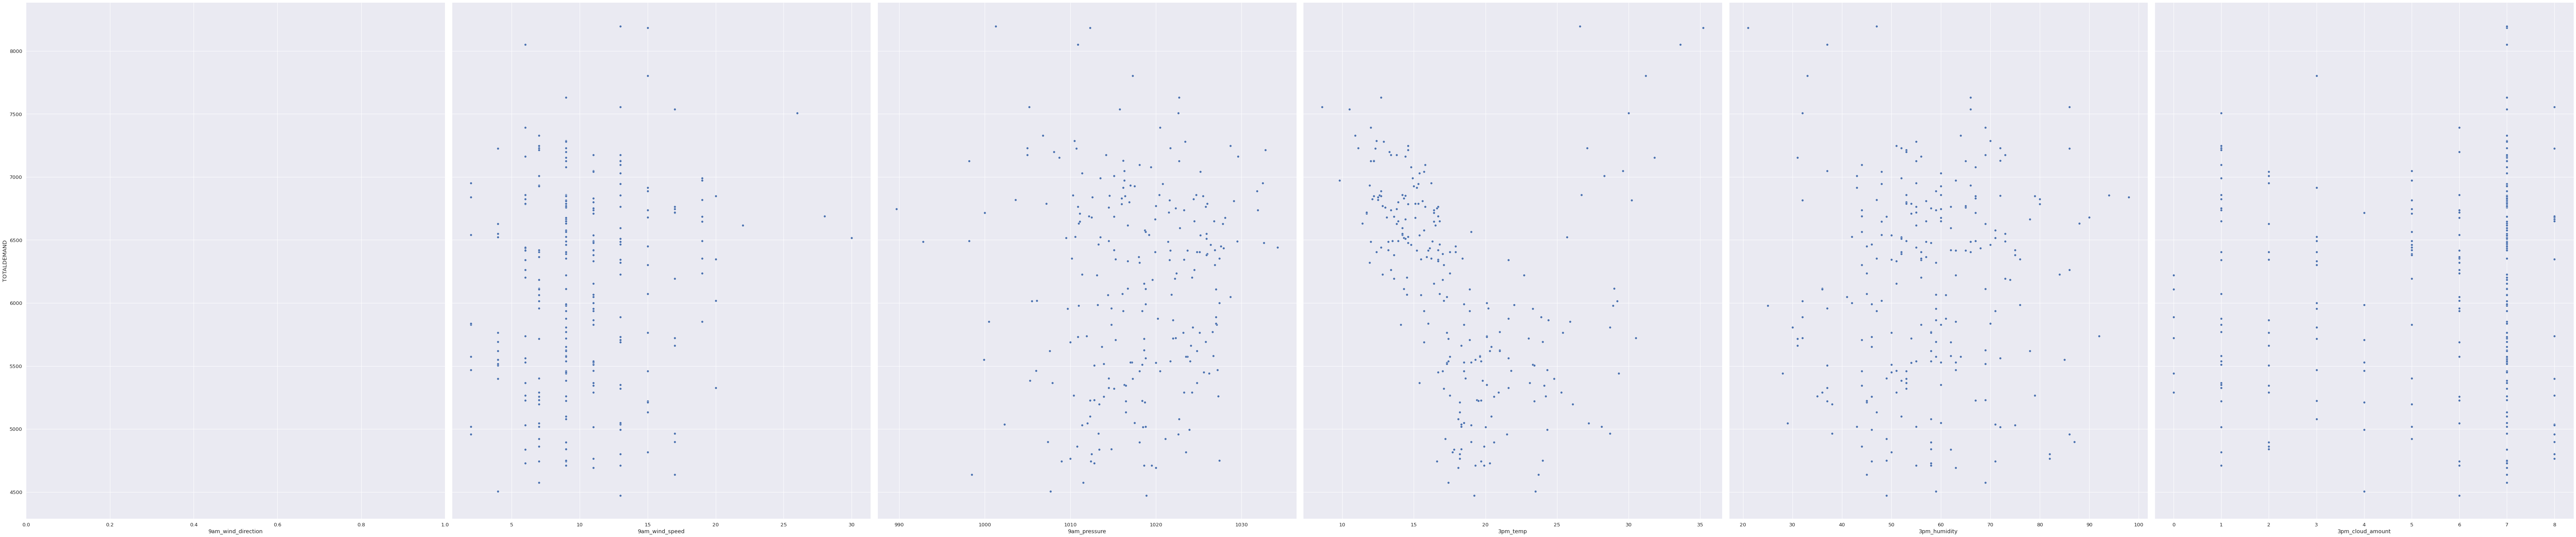

In [58]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['9am_wind_direction','9am_wind_speed', '9am_pressure','3pm_temp', '3pm_humidity',
       '3pm_cloud_amount'], y_vars='TOTALDEMAND', height=20, aspect=0.8)

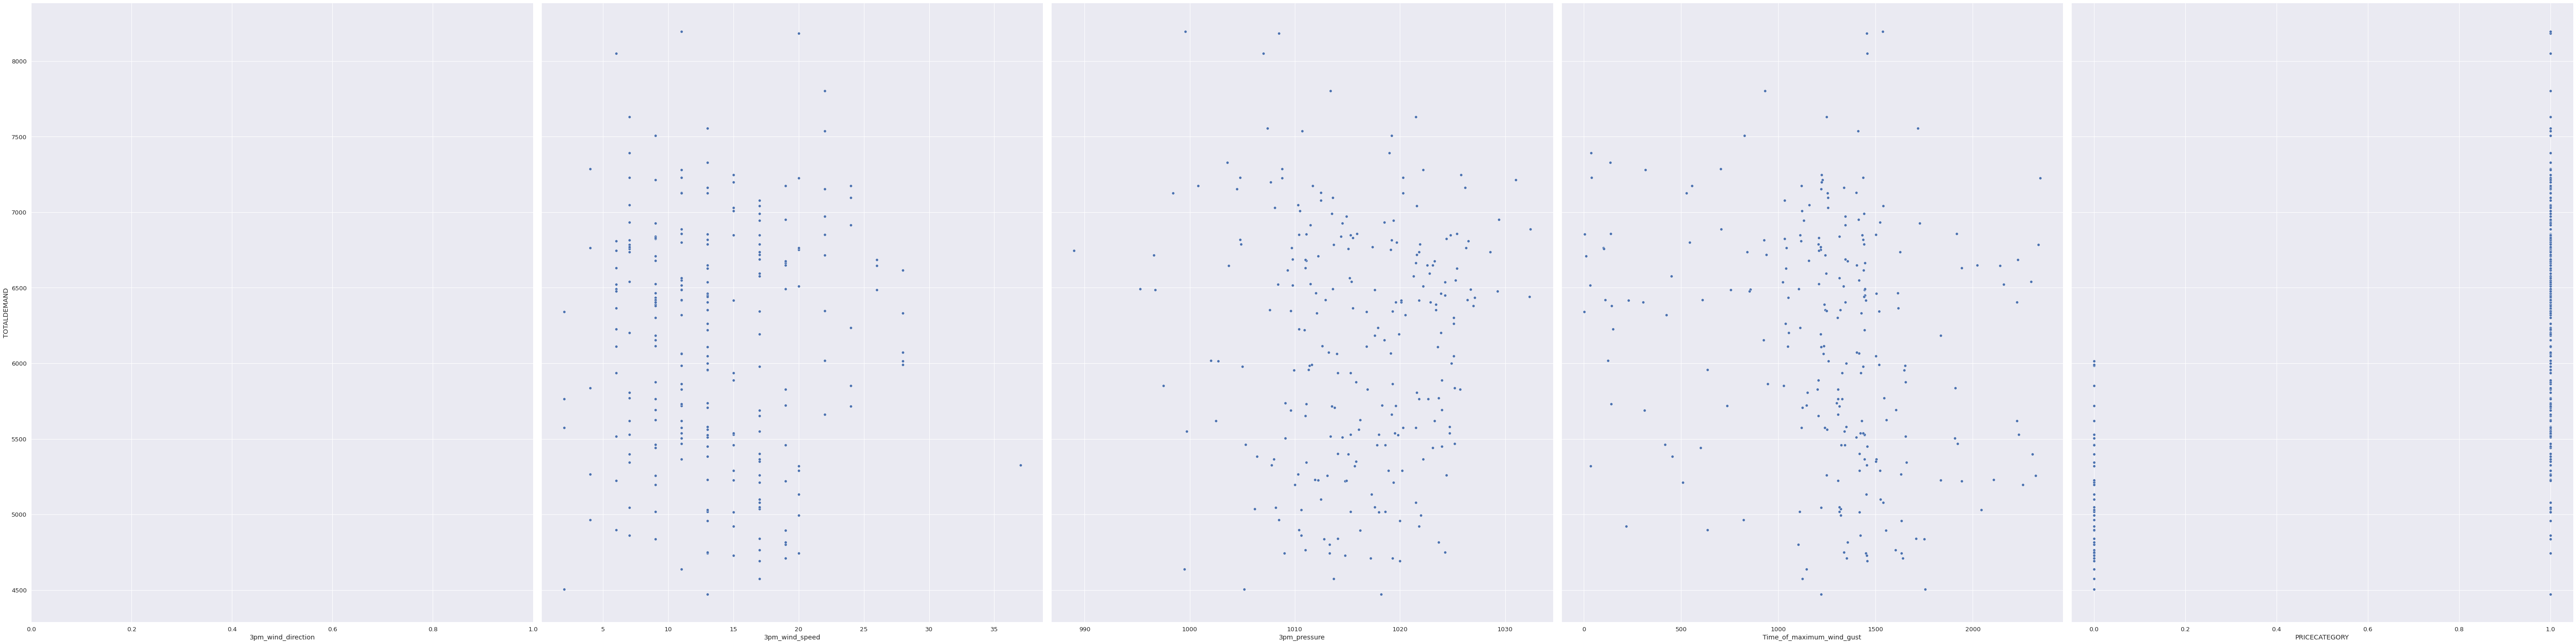

In [59]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['3pm_wind_direction', '3pm_wind_speed', 
                           '3pm_pressure', 'Time_of_maximum_wind_gust', 'PRICECATEGORY'], y_vars='TOTALDEMAND', height=20, aspect=0.8)

### Case 1: Feature selection using correlation Coefficients

In [60]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['Min_temp', 'Max_temp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Direction_of_maximum_wind_gust', 'Speed_of_maximum_wind_gust',
       '9am_temp', '9am_humidity', '9am_cloud_amount', '9am wind direction',
       '9am_wind_speed', '9am_pressure', '3pm_temp', '3pm_humidity',
       '3pm_cloud_amount', '3pm wind direction', '3pm_wind_speed',
       '3pm_pressure', 'PRICECATEGORY']
X = data[feature_cols]
y = data.TOTALDEMAND

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

12274.43319240765
[-8.18180358e+01  7.22082041e+01  7.62656012e+00  1.07736408e+01
 -3.67905410e+01  5.00858644e-01  6.89341039e+00 -1.20467827e+01
 -5.94846405e+00 -2.37913421e+01 -1.18340729e+00  1.10127478e+01
  1.09397819e+01 -5.27728564e+01  2.41765983e+00  1.59422288e+01
 -1.26805277e+00 -1.68475549e+01 -1.64622183e+01  8.37400109e+02]


In [61]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('Min_temp', -81.81803581422254),
 ('Max_temp', 72.20820408534797),
 ('Rainfall', 7.626560119634174),
 ('Evaporation', 10.773640783513587),
 ('Sunshine', -36.79054100103099),
 ('Direction_of_maximum_wind_gust', 0.5008586443614366),
 ('Speed_of_maximum_wind_gust', 6.893410387559696),
 ('9am_temp', -12.046782710144765),
 ('9am_humidity', -5.948464047511876),
 ('9am_cloud_amount', -23.791342146506686),
 ('9am wind direction', -1.1834072887139762),
 ('9am_wind_speed', 11.012747830068188),
 ('9am_pressure', 10.939781895542952),
 ('3pm_temp', -52.77285638400546),
 ('3pm_humidity', 2.417659830213921),
 ('3pm_cloud_amount', 15.942228828718957),
 ('3pm wind direction', -1.2680527698560629),
 ('3pm_wind_speed', -16.847554913108368),
 ('3pm_pressure', -16.46221831410054),
 ('PRICECATEGORY', 837.4001086674265)]

In [62]:
correlations = data.corr()

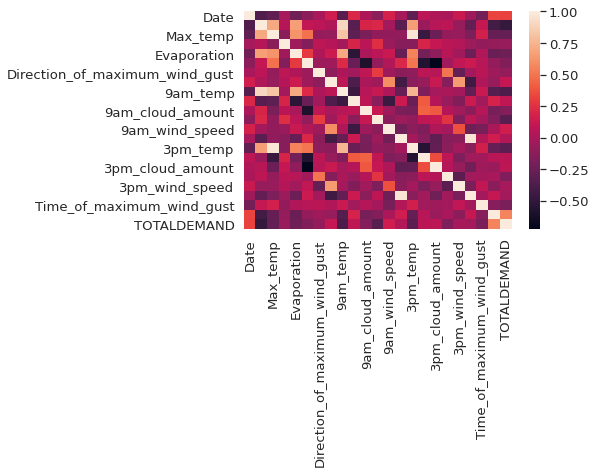

In [63]:
sns.heatmap(correlations)
plt.show()

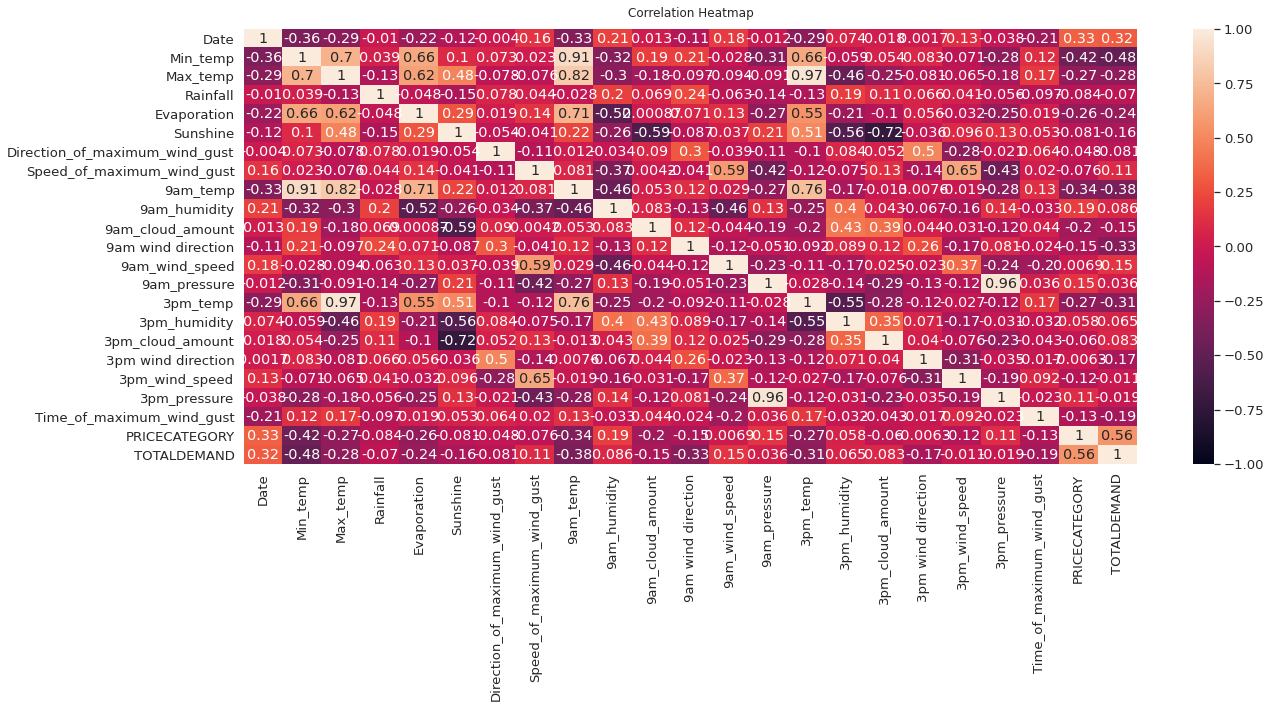

In [64]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 8))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

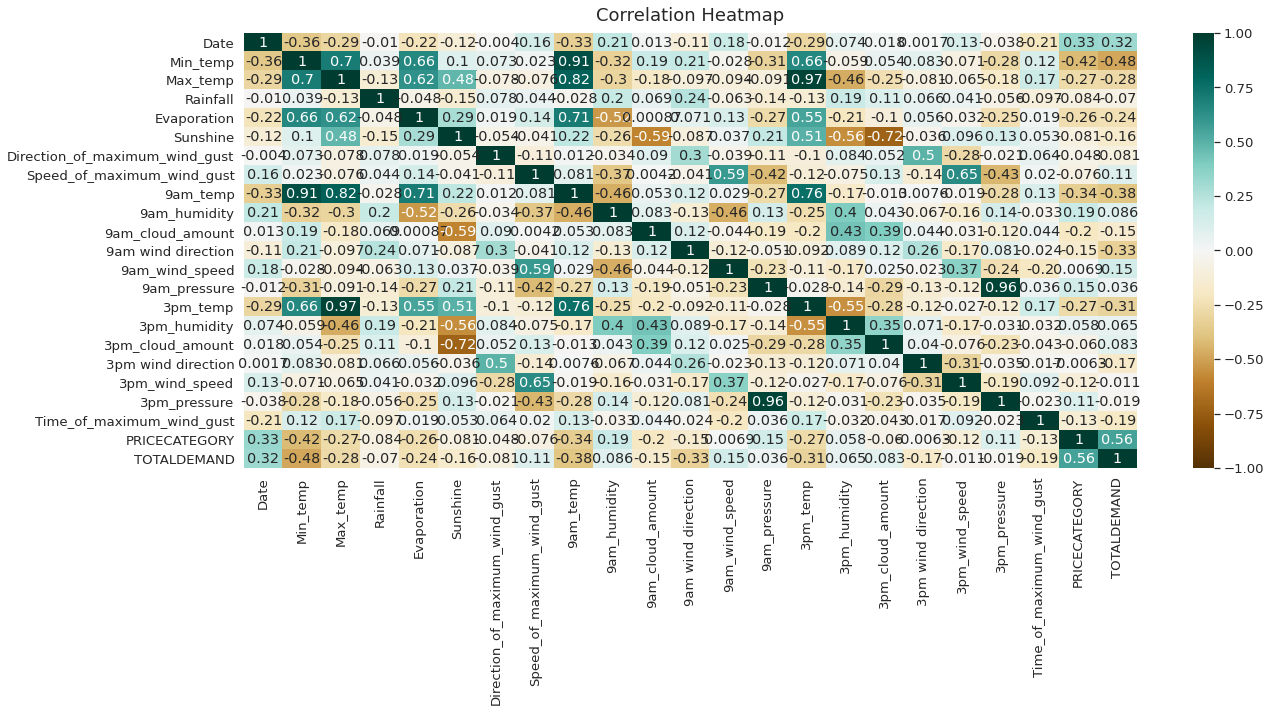

In [65]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

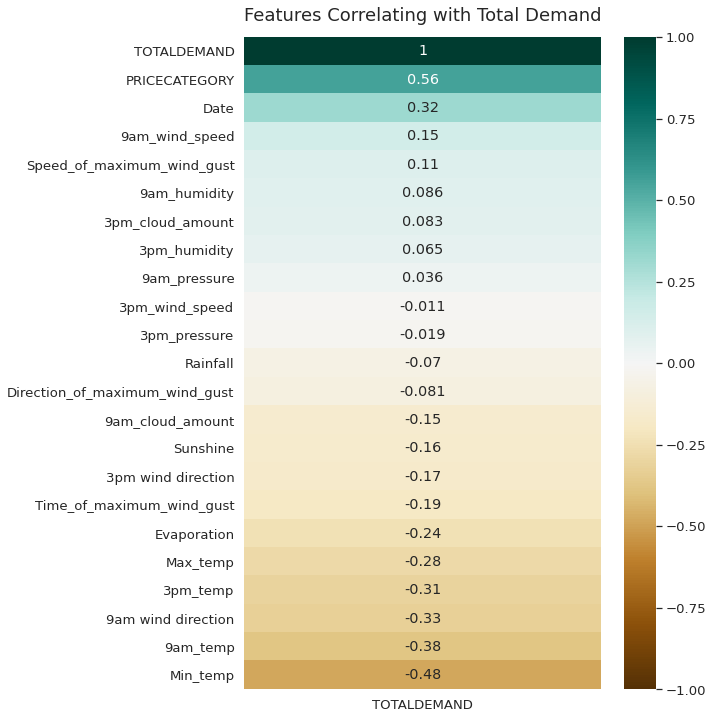

In [66]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['TOTALDEMAND']].sort_values(by='TOTALDEMAND', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Total Demand', fontdict={'fontsize':18}, pad=16);
#correlation with Total Demand

In [67]:
#importing libraries
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif

features = ['Min_temp', 'Max_temp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Direction_of_maximum_wind_gust', 'Speed_of_maximum_wind_gust',
       '9am_temp', '9am_humidity', '9am_cloud_amount', '9am wind direction',
       '9am_wind_speed', '9am_pressure', '3pm_temp', '3pm_humidity',
       '3pm_cloud_amount', '3pm wind direction', '3pm_wind_speed',
       '3pm_pressure', 'Time_of_maximum_wind_gust', 'PRICECATEGORY']
print('Features',features)

X = data[features]
y = data['TOTALDEMAND']
print(X.head())
y.head()

X_train, X_test, y_train, y_test = train_test_split(X, # features
                                                    y, # class label
                                                    train_size=0.8, # proportion to use for train
                                                    test_size=0.2, # proportion to use for test
                                                    random_state=42 # the random state is fixed to 42
                                                   )

Features ['Min_temp', 'Max_temp', 'Rainfall', 'Evaporation', 'Sunshine', 'Direction_of_maximum_wind_gust', 'Speed_of_maximum_wind_gust', '9am_temp', '9am_humidity', '9am_cloud_amount', '9am wind direction', '9am_wind_speed', '9am_pressure', '3pm_temp', '3pm_humidity', '3pm_cloud_amount', '3pm wind direction', '3pm_wind_speed', '3pm_pressure', 'Time_of_maximum_wind_gust', 'PRICECATEGORY']
   Min_temp  Max_temp  Rainfall  Evaporation  Sunshine  \
0      15.6      29.9       0.0          2.8       9.3   
1      18.4      29.0       0.0          9.4       1.3   
2      17.0      26.2      12.6          4.8       7.1   
3      16.0      18.6       2.6          3.8       0.0   
4      15.9      19.1      11.2          1.0       0.0   

   Direction_of_maximum_wind_gust  Speed_of_maximum_wind_gust  9am_temp  \
0                            22.5                        31.0      19.2   
1                           337.5                        30.0      23.3   
2                           247.5  

#### Case 2: Feature selection using the Mutual Information metric

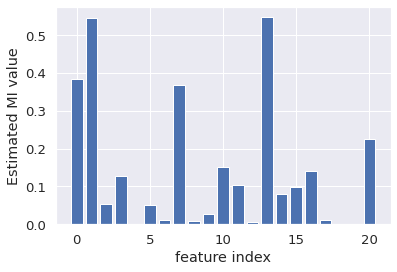

In [68]:
# feature selection
f_selector = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("Estimated MI value")
plt.show()

##### The y-axis represents the estimated mutual information between each feature and the target variable. Compared to the correlation feature selection method we can clearly see many more features scored as being relevant. This may be because of the statistical noise that might exists in the dataset.

#### The plot above shows that feature 1,2,8,14,20 are more important than the other features as these have MI above 0.2

# Building our Regression Model

## MODEL 1 - Model using All features

In [69]:
#import essential
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
features = ['Min_temp', 'Max_temp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Direction_of_maximum_wind_gust', 'Speed_of_maximum_wind_gust',
       '9am_temp', '9am_humidity', '9am_cloud_amount', '9am wind direction',
       '9am_wind_speed', '9am_pressure', '3pm_temp', '3pm_humidity',
       '3pm_cloud_amount', '3pm wind direction', '3pm_wind_speed',
       '3pm_pressure', 'Time_of_maximum_wind_gust', 'PRICECATEGORY']
print('Features',features)

x = data[features]
y = data['TOTALDEMAND']

Features ['Min_temp', 'Max_temp', 'Rainfall', 'Evaporation', 'Sunshine', 'Direction_of_maximum_wind_gust', 'Speed_of_maximum_wind_gust', '9am_temp', '9am_humidity', '9am_cloud_amount', '9am wind direction', '9am_wind_speed', '9am_pressure', '3pm_temp', '3pm_humidity', '3pm_cloud_amount', '3pm wind direction', '3pm_wind_speed', '3pm_pressure', 'Time_of_maximum_wind_gust', 'PRICECATEGORY']


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, # features
                                                    y, # class label
                                                    train_size=0.8, # proportion to use for train
                                                    test_size=0.2, # proportion to use for test
                                                    random_state=42 # the random state is fixed to 42
                                                   )

y.head()

0    5019.64
1    4964.35
2    4503.31
3    4764.18
4    4800.64
Name: TOTALDEMAND, dtype: float64

In [72]:
lr = LinearRegression(fit_intercept=True)

# fitting the training data
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)

# predicting the accuracy score
accuracy_score = r2_score(y_train,y_train_pred)
print(accuracy_score)

# predict values of y given our hidden test set
y_prediction =  lr.predict(X_test)
y_prediction

# calculate evaluation metrics
MSE = mean_squared_error(y_test, y_prediction)
R2 = lr.score(X_test, y_test)
print(MSE)
print(R2)

0.6057184796955677
467915.3846484959
0.1699979367998007


In [73]:
y_test[:5], y_prediction[:5]

(116    6487.76
 16     4473.05
 216    6416.19
 127    5517.34
 6      4994.78
 Name: TOTALDEMAND, dtype: float64,
 array([6071.4207794 , 5729.16433174, 5905.57132988, 6215.72216733,
        4787.69394528]))

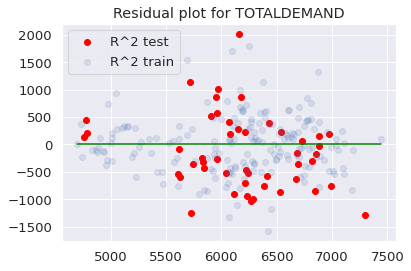

In [74]:
# Checking accuracy of our model
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

# calculate residuals
residual_test = [true_val - estimated_val for true_val, estimated_val in zip(y_test, y_pred_test)]
residual_train = [true_val - estimated_val for true_val, estimated_val in zip(y_train, y_pred_train)]

# plot residuals
plt.scatter(y_pred_test, residual_test, label='R^2 test', color='red')
plt.scatter(y_pred_train, residual_train, label='R^2 train', alpha=0.15)

# plot the 0 line (we want our residuals close to 0)
plt.plot([min(y_pred_train), max(y_pred_train)], [0,0], color='green')

plt.legend()

plt.title("Residual plot for TOTALDEMAND")
plt.show()

## MODEL 2 - Model using feature selection from Mutual Information Metric

In [75]:
features = ['Min_temp', 'Max_temp', '9am_temp', '3pm_temp', 'PRICECATEGORY']
print('Features',features)

X2 = data[features]
print("X2 shape",X2.shape)

y2 = data['TOTALDEMAND']
print("Y2 shape",y2.shape)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, # features
                                                    y, # class label
                                                    train_size=0.8, # proportion to use for train
                                                    test_size=0.2, # proportion to use for test
                                                    random_state=42 # the random state is fixed to 42
                                                   )

Features ['Min_temp', 'Max_temp', '9am_temp', '3pm_temp', 'PRICECATEGORY']
X2 shape (237, 5)
Y2 shape (237,)


In [76]:
lr = LinearRegression(fit_intercept=True)

# fitting the training data
lr.fit(X2_train,y2_train)
y2_train_pred = lr.predict(X2_train)

# predicting the accuracy score
accuracy_score = r2_score(y2_train,y2_train_pred)
print(accuracy_score)

# predict values of y given our hidden test set
y2_prediction =  lr.predict(X2_test)
y2_prediction

# calculate evaluation metrics
MSE = mean_squared_error(y2_test, y2_prediction)
R2 = lr.score(X2_test, y2_test)
print(MSE)
print(R2)

0.4871029552196354
507062.0258570186
0.10055847394725947


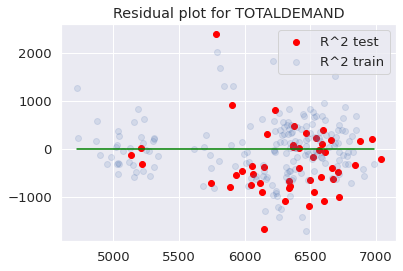

In [77]:
# Checking accuracy of our model
y2_pred_test = lr.predict(X2_test)
y2_pred_train = lr.predict(X2_train)

# calculate residuals
residual_test = [true_val - estimated_val for true_val, estimated_val in zip(y2_test, y2_pred_test)]
residual_train = [true_val - estimated_val for true_val, estimated_val in zip(y2_train, y2_pred_train)]

# plot residuals
plt.scatter(y2_pred_test, residual_test, label='R^2 test', color='red')
plt.scatter(y2_pred_train, residual_train, label='R^2 train', alpha=0.15)

# plot the 0 line (we want our residuals close to 0)
plt.plot([min(y2_pred_train), max(y2_pred_train)], [0,0], color='green')

plt.legend()

plt.title("Residual plot for TOTALDEMAND")
plt.show()

## MODEL 3 - Model using feature selection from correlation (pairplot / Heatmap)

#### From the pairplot, we can assume correlation between 'PRICECATEGORY', '9am wind direction', 'Evaporation', 'Min_temp', 'Max_temp', '9am_temp','3pm_temp', '9am_wind_speed'. Using them to create a model

In [82]:
features = ['Min_temp', 'Max_temp', 'Evaporation', '9am_temp', '9am wind direction','9am_wind_speed', '3pm_temp', 'PRICECATEGORY']
print('Features',features)

X3 = data[features]
print("X3 shape",X3.shape)

y3 = data['TOTALDEMAND']
print("Y3 shape",y3.shape)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, # features
                                                    y, # class label
                                                    train_size=0.7, # proportion to use for train
                                                    test_size=0.3, # proportion to use for test
                                                    random_state=42 # the random state is fixed to 42
                                                   )

Features ['Min_temp', 'Max_temp', 'Evaporation', '9am_temp', '9am wind direction', '9am_wind_speed', '3pm_temp', 'PRICECATEGORY']
X3 shape (237, 8)
Y3 shape (237,)


In [83]:
lr = LinearRegression(fit_intercept=True)

# fitting the training data
lr.fit(X3_train,y3_train)
y3_train_pred = lr.predict(X3_train)

# predicting the accuracy score
accuracy_score = r2_score(y3_train,y3_train_pred)
print(accuracy_score)

# predict values of y given our hidden test set
y3_prediction =  lr.predict(X3_test)
y3_prediction

# calculate evaluation metrics
R2 = lr.score(X3_test, y3_test)
R2

0.5375268751414677


0.24218764478677357

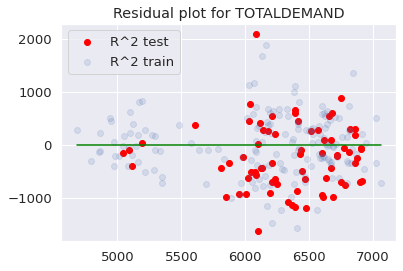

In [85]:
# Checking accuracy of our model
y3_pred_test = lr.predict(X3_test)
y3_pred_train = lr.predict(X3_train)

# calculate residuals
residual_test = [true_val - estimated_val for true_val, estimated_val in zip(y3_test, y3_pred_test)]
residual_train = [true_val - estimated_val for true_val, estimated_val in zip(y3_train, y3_pred_train)]

# plot residuals
plt.scatter(y3_pred_test, residual_test, label='R^2 test', color='red')
plt.scatter(y3_pred_train, residual_train, label='R^2 train', alpha=0.15)

# plot the 0 line (we want our residuals close to 0)
plt.plot([min(y3_pred_train), max(y3_pred_train)], [0,0], color='green')

plt.legend()

plt.title("Residual plot for TOTALDEMAND")
plt.show()

#### Accuracy results from linear regression is not so great

##### From the residual plots we can infer that:
##### 1. We have small residuals that are close to 0.
##### 2. There is no bias or trend in the residuals
##### 3. There is no pattern or trend in the residuals.
##### 4. Not many features show correlation. So feature selection needs to be done more accurately
##### This means that with a larger dataset and less noise in the data, we should be able to improve our model
##### Other regression models could also be done for better understanding 

# PROBLEM 2
#### We want to classify the price category

#### Model 1 : DecisionTree Classifier

In [86]:
df = pd.read_csv("Final data for modelling.csv")
df.head()

,Date,Min_temp,Max_temp,Rainfall,Evaporation,Sunshine,Direction_of_maximum_wind_gust,Speed_of_maximum_wind_gust,9am_temp,9am_humidity,...,9am_pressure,3pm_temp,3pm_humidity,3pm_cloud_amount,3pm wind direction,3pm_wind_speed,3pm_pressure,Time_of_maximum_wind_gust,PRICECATEGORY,TOTALDEMAND
0,737791,15.6,29.9,0.0,2.8,9.3,22.5,31.0,19.2,77.0,...,1018.8,28.1,43,5.0,90.0,13,1015.3,1314.0,0,5019.64
1,737822,18.4,29.0,0.0,9.4,1.3,337.5,30.0,23.3,52.0,...,1013.3,28.7,38,7.0,225.0,4,1008.5,822.0,0,4964.35
2,737850,17.0,26.2,12.6,4.8,7.1,247.5,33.0,18.3,100.0,...,1007.7,23.5,59,4.0,202.5,2,1005.2,1755.0,0,4503.31
3,737881,16.0,18.6,2.6,3.8,0.0,157.5,41.0,16.2,98.0,...,1010.0,18.2,82,8.0,202.5,17,1011.0,1603.0,0,4764.18
4,737911,15.9,19.1,11.2,1.0,0.0,157.5,35.0,17.2,96.0,...,1012.5,18.2,82,8.0,157.5,19,1013.3,1102.0,0,4800.64


In [130]:
#df.columns

In [131]:
df = df.reindex(columns=['Date', 'Min_temp', 'Max_temp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Direction_of_maximum_wind_gust', 'Speed_of_maximum_wind_gust',
       '9am_temp', '9am_humidity', '9am_cloud_amount', '9am wind direction',
       '9am_wind_speed', '9am_pressure', '3pm_temp', '3pm_humidity',
       '3pm_cloud_amount', '3pm wind direction', '3pm_wind_speed',
       '3pm_pressure', 'Time_of_maximum_wind_gust', 'TOTALDEMAND','PRICECATEGORY'])

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            237 non-null    int64  
 1   Min_temp                        237 non-null    float64
 2   Max_temp                        237 non-null    float64
 3   Rainfall                        237 non-null    float64
 4   Evaporation                     237 non-null    float64
 5   Sunshine                        237 non-null    float64
 6   Direction_of_maximum_wind_gust  237 non-null    float64
 7   Speed_of_maximum_wind_gust      237 non-null    float64
 8   9am_temp                        237 non-null    float64
 9   9am_humidity                    237 non-null    float64
 10  9am_cloud_amount                237 non-null    int64  
 11  9am wind direction              237 non-null    float64
 12  9am_wind_speed                  237 

In [157]:
# Features (get all columns except the last one which is our label has_diabetes)
X = df[df.columns[:-1]]
X.head()

,Date,Min_temp,Max_temp,Rainfall,Evaporation,Sunshine,Direction_of_maximum_wind_gust,Speed_of_maximum_wind_gust,9am_temp,9am_humidity,...,9am_wind_speed,9am_pressure,3pm_temp,3pm_humidity,3pm_cloud_amount,3pm wind direction,3pm_wind_speed,3pm_pressure,Time_of_maximum_wind_gust,TOTALDEMAND
0,737791,15.6,29.9,0.0,2.8,9.3,22.5,31.0,19.2,77.0,...,2,1018.8,28.1,43,5.0,90.0,13,1015.3,1314.0,5019.64
1,737822,18.4,29.0,0.0,9.4,1.3,337.5,30.0,23.3,52.0,...,17,1013.3,28.7,38,7.0,225.0,4,1008.5,822.0,4964.35
2,737850,17.0,26.2,12.6,4.8,7.1,247.5,33.0,18.3,100.0,...,4,1007.7,23.5,59,4.0,202.5,2,1005.2,1755.0,4503.31
3,737881,16.0,18.6,2.6,3.8,0.0,157.5,41.0,16.2,98.0,...,11,1010.0,18.2,82,8.0,202.5,17,1011.0,1603.0,4764.18
4,737911,15.9,19.1,11.2,1.0,0.0,157.5,35.0,17.2,96.0,...,13,1012.5,18.2,82,8.0,157.5,19,1013.3,1102.0,4800.64


In [158]:
# Class label
y = df['PRICECATEGORY']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: PRICECATEGORY, dtype: int64

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, # features
                                                    y, # class label
                                                    train_size=0.8, # proportion to use for train
                                                    test_size=0.2, # proportion to use for test
                                                    random_state=42 # the random state is fixed to 42
                                                   )

In [160]:
from sklearn.tree import DecisionTreeClassifier

# initialise the tree
dt = DecisionTreeClassifier(criterion="entropy", # the criterion to split - we will use entropy
                            random_state=42, # the random state to run this at
                            max_depth=3 # the depth of the tree
)

# fit it to the training dataset
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [161]:
# assign y_pred to the predictions of the DT given the X_test
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0])

In [162]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8958333333333334

In [176]:
#Using confusion matrix, evaluating the model

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{:.2f}'.format(accuracy))
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n",cm)
print(classification_report(y_test, y_pred))

Accuracy:0.90
Confusion Matrix 
 [[ 3  0]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       1.00      0.89      0.94        45

    accuracy                           0.90        48
   macro avg       0.69      0.94      0.74        48
weighted avg       0.96      0.90      0.92        48



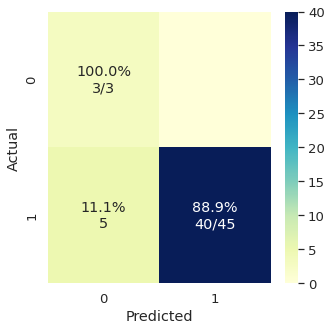

In [177]:
#COnfusion matrix Heatmap
def plot_cm(y_test, y_pred, figsize=(5,5)):
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(y_test, y_pred)

#### Feature Selection using Decision Tree

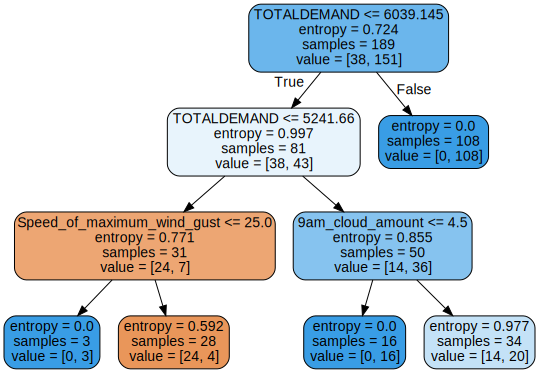

In [164]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dt, # the model we trained
                out_file="mytree.dot", # name of the output file - has to be a .dot file
                feature_names=X.columns, # the names of our features
                filled=True, # formatting: do we want to fill the features with colour
                rounded=True # formatting: do we want rounded edges
               )

# then, open the file using Python
with open("./mytree.dot") as f:
    dot_graph = f.read()

# visualize using graphviz, you won't be able to "open" it using normal methods
graphviz.Source(dot_graph)

In [165]:
X.columns

Index(['Date', 'Min_temp', 'Max_temp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Direction_of_maximum_wind_gust', 'Speed_of_maximum_wind_gust',
       '9am_temp', '9am_humidity', '9am_cloud_amount', '9am wind direction',
       '9am_wind_speed', '9am_pressure', '3pm_temp', '3pm_humidity',
       '3pm_cloud_amount', '3pm wind direction', '3pm_wind_speed',
       '3pm_pressure', 'Time_of_maximum_wind_gust', 'TOTALDEMAND'],
      dtype='object')

In [166]:
# Determine feature of importance
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0841256 , 0.        , 0.        ,
       0.10960307, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.80627133])

##### Feature of importance : 'Speed_of_maximum_wind_gust', '9am_cloud_amount', 'TOTALDEMAND'

### MODEL 2 : Logistic Regression using the feature of importance

In [167]:
features = ['Speed_of_maximum_wind_gust', '9am_cloud_amount', 'TOTALDEMAND']
print('Features',features)

X1 = df[features]
print("X1 shape",X1.shape)

y1 = df['PRICECATEGORY']
print("Y1 shape",y1.shape)

Features ['Speed_of_maximum_wind_gust', '9am_cloud_amount', 'TOTALDEMAND']
X1 shape (237, 3)
Y1 shape (237,)


In [168]:
# Splitting the dataset into Train and Test set
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, # features
                                                    y1, # class label
                                                    train_size=0.8, # proportion to use for train
                                                    test_size=0.2, # proportion to use for test
                                                    random_state=42 # the random state is fixed to 42
                                                   )

print("X_Train set shape",X1_train.shape)
print("X_Test set shape",X1_test.shape)
print("Y Train set shape",y1_train.shape)
print("Y Train set shape",y1_train.shape)

X_Train set shape (189, 3)
X_Test set shape (48, 3)
Y Train set shape (189,)
Y Train set shape (189,)


In [173]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X1_train,y1_train)

y1_pred = logistic.predict(X1_test)
y1_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1])

In [174]:
#Using confusion matrix, evaluating the model

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

accuracy = metrics.accuracy_score(y1_test,y1_pred)
print('Accuracy:{:.2f}'.format(accuracy))
cm = confusion_matrix(y1_test,y1_pred)
print("Confusion Matrix \n",cm)
print(classification_report(y1_test, y1_pred))

Accuracy:0.92
Confusion Matrix 
 [[ 2  1]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.98      0.93      0.95        45

    accuracy                           0.92        48
   macro avg       0.69      0.80      0.73        48
weighted avg       0.94      0.92      0.93        48



##### For the given dataset our model seems to have a 90% accuracy score

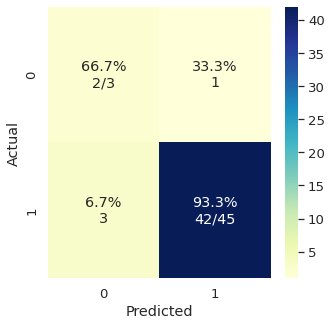

In [178]:
#COnfusion matrix Heatmap
def plot_cm(y1_test, y1_pred, figsize=(5,5)):
    cm = confusion_matrix(y1_test, y1_pred, labels=np.unique(y1_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y1_test), columns=np.unique(y1_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(y1_test, y1_pred)

#### Both the models seem to be showing very good accuracy